In [2]:
from perfetto.trace_processor import TraceProcessor, TraceProcessorConfig
import matplotlib.pyplot as plt




In [3]:
# 创建 TraceProcessorConfig 对象并设置 verbose=True
config = TraceProcessorConfig(verbose=True,bin_path='./trace_processor')

# 初始化 TraceProcessor 对象时传入配置对象
tp = TraceProcessor(trace='./refers/trace',config=config)
qr_it = tp.query('select ts, counter_track.name, value  from counter join counter_track where counter_track.id=counter.track_id')
qr_df = qr_it.as_pandas_dataframe()
print(qr_df.head())

[268.298]             httpd.cc:99 [HTTP] Starting RPC server on localhost:49280
[268.298]            httpd.cc:104 [HTTP] This server can be used by reloading https://ui.perfetto.dev and clicking on YES on the "Trace Processor native acceleration" dialog or through the Python API (see https://perfetto.dev/docs/analysis/trace-processor#python-api).
[269.182]       http_server.cc:83 [HTTP] New connection
[269.182]      http_server.cc:231 [HTTP] GET /status [body=0B, origin=""]
[269.183]       http_server.cc:90 [HTTP] Client disconnected
[269.188]       http_server.cc:83 [HTTP] New connection
[269.188]      http_server.cc:231 [HTTP] POST /parse [body=1048576B, origin=""]
[269.198]      http_server.cc:231 [HTTP] POST /parse [body=1048576B, origin=""]
[269.202]      http_server.cc:231 [HTTP] POST /parse [body=1048576B, origin=""]
[269.205]      http_server.cc:231 [HTTP] POST /parse [body=1048576B, origin=""]
[269.209]      http_server.cc:231 [HTTP] POST /parse [body=547470B, origin=""]
[269.

                 ts             name         value
0  1308963560000000  power.rails.tpu  2332897248.0
1  1308963721000000  power.rails.tpu  2332899371.0
2  1308963971000000  power.rails.tpu  2332902667.0
3  1308964221000000  power.rails.tpu  2332905950.0
4  1308964470000000  power.rails.tpu  2332909233.0


In [7]:
power_df = qr_df[qr_df['name'].str[:5] == 'power']
print(power_df['ts'].value_counts())

ts
1308978481000000    16
1308978478000000    16
1308974609000000    16
1308974607000000    16
1308963560000000     8
                    ..
1309002972000000     8
1309002719000000     8
1309002469000000     8
1309002227000000     8
1309023472000000     8
Name: count, Length: 478, dtype: int64


['power.rails.aoc.logic', 'power.rails.aoc.memory', 'power.rails.cpu.big', 'power.rails.cpu.little', 'power.rails.cpu.mid', 'power.rails.ddr.a', 'power.rails.ddr.b', 'power.rails.ddr.c', 'power.rails.display', 'power.rails.gpu', 'power.rails.memory.interface', 'power.rails.modem', 'power.rails.radio.frontend', 'power.rails.system.fabric', 'power.rails.tpu', 'power.rails.wifi.bt']


/var/folders/xk/5bd8h9y930n1m1vlv1v2r_wc0000gn/T/ipykernel_2197/3504263667.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  time_diffs_nonzero = time_diffs.replace(0, float('nan'))
/var/folders/xk/5bd8h9y930n1m1vlv1v2r_wc0000gn/T/ipykernel_2197/3504263667.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ratio'] =  diffs / time_diffs_nonzero
/var/folders/xk/5bd8h9y930n1m1vlv1v2r_wc0000gn/T/ipykernel_2197/3504263667.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in

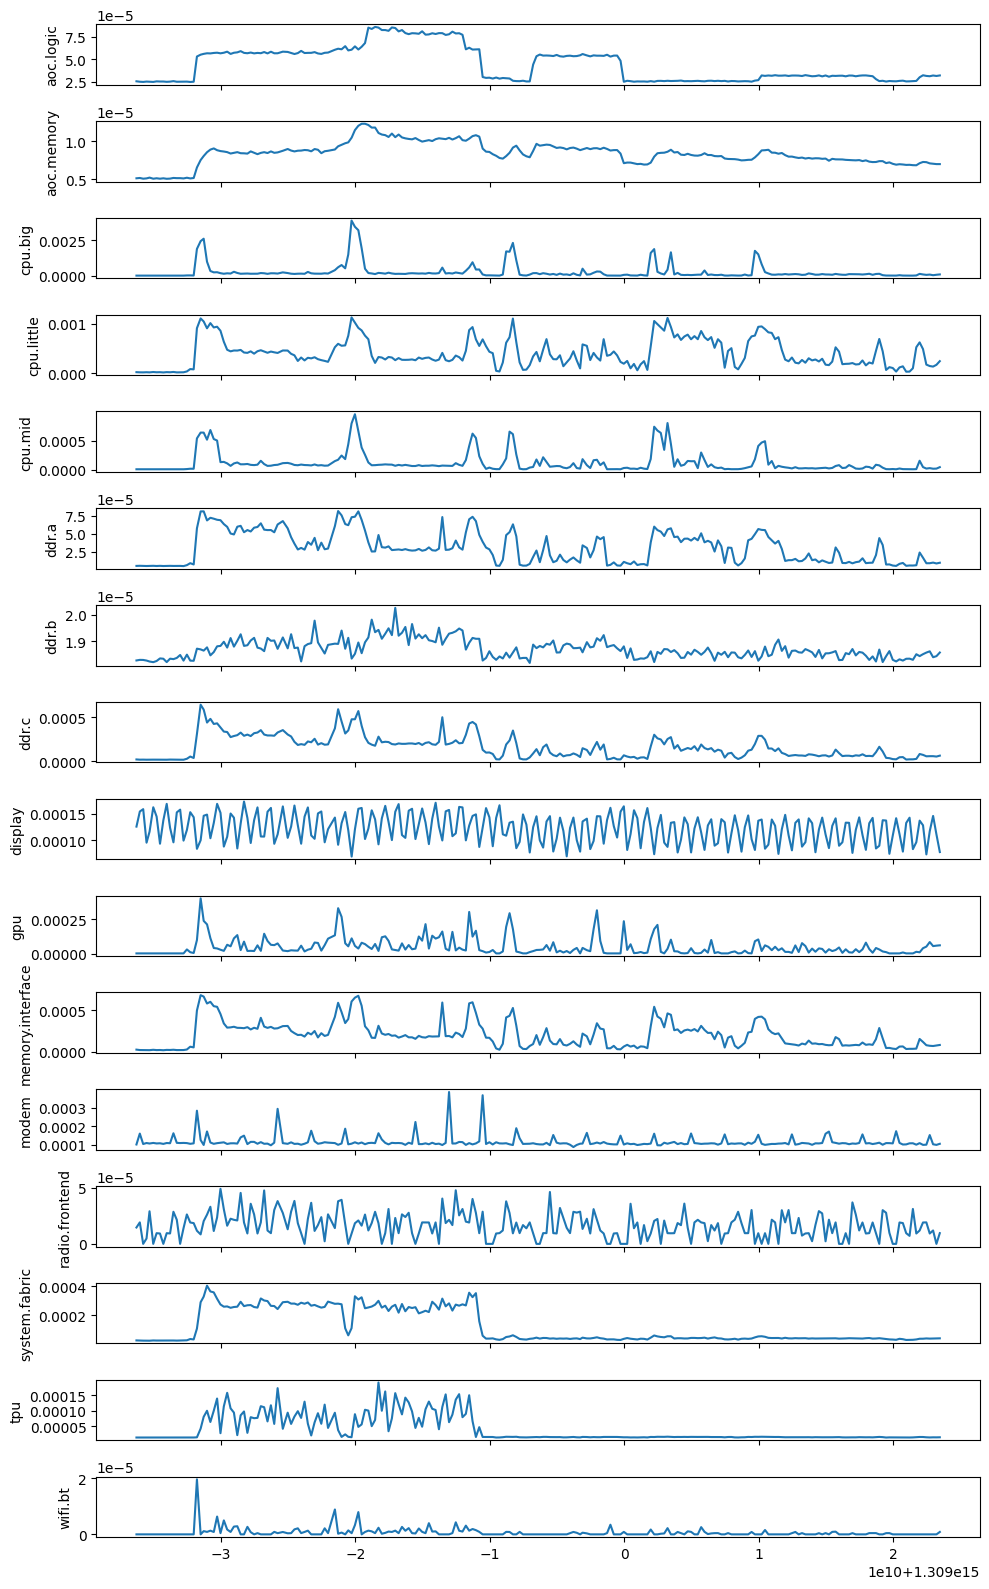

In [22]:

# 获取所有唯一的 'name'
unique_names = sorted(power_df['name'].unique())
print(unique_names)

# 确定子图的行数和列数
num_rows = len(unique_names)
num_cols = 1

# 创建一个新的图形，包含所需行列的子图
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 1*num_rows), sharex=True)

# 遍历每个 'name'，在相应的子图中绘制对应的数据
for i, name in enumerate(unique_names):
    # 选择当前 'name' 对应的数据
    data = power_df[power_df['name'] == name]
    diffs = data['value'].diff()
    time_diffs = data['ts'].diff()
    time_diffs_nonzero = time_diffs.replace(0, float('nan'))
    data['ratio'] =  diffs / time_diffs_nonzero
   
    # 绘制线图
    # axes[i].plot(data['ts'].iloc[1:], diffs.iloc[1:], label=name)
    data_cleaned = data.dropna(subset=['ratio'])
    axes[i].plot(data_cleaned['ts'], data_cleaned['ratio'],label=name)
   
    # 添加标题和标签
    axes[i].set_ylabel(name[12:])



# 调整子图布局
plt.tight_layout()

# 显示图形
plt.show()
